<a href="https://colab.research.google.com/github/chandella07/TF_practice/blob/master/TF_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Run this first

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.executing_eagerly()

True

#Computer Vision

##Simple DNN : fashion_mnist multi-class categorization

In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback

fashion_mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()
training_images, test_images = training_images/255.0, test_images/255.0

In [ ]:
# check for how many labels and the shape of input size
y, idx = tf.unique(test_labels)
print(len(y))
print((np.array(training_images[0])).shape)

10
(28, 28)


**Layer Shapes**
- The rule of thumb that the **first layer** in the network should be **the same shape as the data**.

**Categorical v.s Sparse Categorical**
- `categorical_crossentropy`: one-hot encoded 
- `sparese_categorical_crossentropy`: labels are encoded as integers

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
________________________________________________

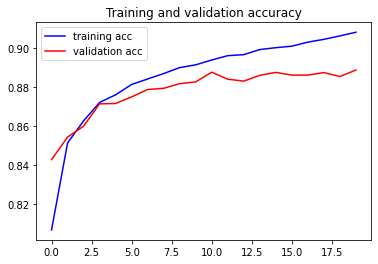

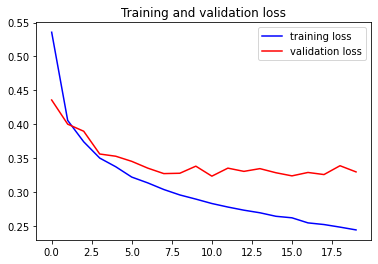

313/313 [==============================] - 1s 2ms/step - loss: 0.3295 - acc: 0.8888
[3.28521108e-12 6.13788664e-12 1.06785816e-13 6.58340917e-12
 2.97547945e-12 1.98256494e-05 2.40921237e-12 5.07229124e-04
 8.14969674e-13 9.99472916e-01]
9


In [ ]:
model_f_m = Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])
model_f_m.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model_f_m.summary()

class mycallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('acc') > 0.99:
        # if logs.get('val_acc') > 0.9
            print('\n Reached 99% accuracy. Training stoped.')
            self.model.stop_training = True

mycallbacks = mycallback()

history_f_m = model_f_m.fit(training_images, 
                            training_labels, 
                            epochs=20, 
                            validation_data=(test_images, test_labels),
                            callbacks=[mycallbacks])

acc, loss = history_f_m.history['acc'], history_f_m.history['loss']
val_acc, val_loss = history_f_m.history['val_acc'], history_f_m.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='training acc')
plt.plot(epochs, val_acc, 'r', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Evaluate 
model_f_m.evaluate(test_images, test_labels)

# predict
classification_fashion_mnist = model_f_m.predict(test_images)
print(classification_fashion_mnist[0])
print(test_labels[0])

In [ ]:
model_f_m.save('fashion_mnist_model.h5')
loaded_model = tf.keras.models.load_model('fashion_mnist_model_to_load.h5')
loaded_model.summary()

##CNN & ImageDataGenerator & augmentation: horses vs human

### download data

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

###Attatch data

In [ ]:
import os, zipfile
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [ ]:
print('total training human images :', len(os.listdir(train_human_dir)))
print('total training horse images :', len(os.listdir(train_horse_dir)))
print('total validation human images :', len(os.listdir(validation_human_dir)))
print('total validation horse images :', len(os.listdir(validation_horse_dir)))

total training human images : 527
total training horse images : 500
total validation human images : 128
total validation horse images : 128


###ImageDataGenerator + Augumentation + Training

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Epoch 1/30
8/8 [==============================] - 19s 2s/step - loss: 0.8437 - acc: 0.5095 - val_loss: 0.6954 - val_acc: 0.5000
Epoch 2/30
8/8 [==============================] - 19s 2s/step - loss: 0.7038 - acc: 0.5195 - val_loss: 0.7030 - val_acc: 0.5000
Epoch 3/30
8/8 [==============================] - 21s 3s/step - loss: 0.6781 - acc: 0.5449 - val_loss: 0.6352 - val_acc: 0.7148
Epoch 4/30
8/8 [==============================] - 18s 2s/step - loss: 0.9280 - acc: 0.5606 - val_loss: 0.7553 - val_acc: 0.5000
Epoch 5/30
8/8 [==============================] - 18s 2s/step - loss: 0.6895 - acc: 0.5239 - val_loss: 0.6940 - val_acc: 0.5000
Epoch 6/30
8/8 [==============================] - 18s 2s/step - loss: 0.6729 - acc: 0.5717 - val_loss: 0.9609 - val_acc: 0.5000
Epoch 7/30
8/8 [==============================] - 21s 3s/step - loss: 0.5875 - acc: 0.6611 - val_loss: 2.2936 - val_acc: 0.5000
Epoch 8/30
8/8 [=====

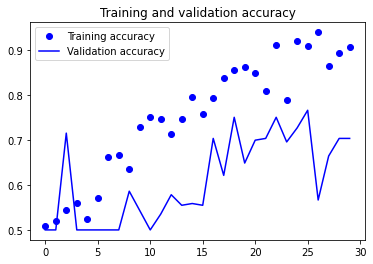

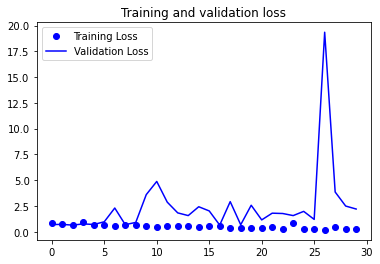

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import RMSprop

train_dir = '/tmp/horse-or-human'
validation_dir = '/tmp/validation-horse-or-human'

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40, #degree
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    batch_size=32, 
    class_mode='binary'
)

model_hoh = Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_hoh.compile(loss='binary_crossentropy',
              optimizer=RMSprop(0.001),
              metrics=['acc'])

# model.fit in tf2 can fit generator
history_hoh = model_hoh.fit(train_generator,
                 steps_per_epoch=8,
                 epochs=30,
                 validation_data=validation_generator,
                 validation_steps=8)

import matplotlib.pyplot as plt
acc = history_hoh.history['acc']
loss = history_hoh.history['loss']
val_acc = history_hoh.history['val_acc']
val_loss = history_hoh.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### learning rate scheduler

In [ ]:
epochs = 50
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
		lambda epoch: 1e-4 * 10**(epochs/20))


model_hoh.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

history_hoh = model_hoh.fit(train_generator,
                 steps_per_epoch=25,
                 epochs=epochs)

# plotting loss function, find the lowest point
lrs = 1e-4 * (10**(np.arange(epochs)/20))
plt.semilogx(lrs, history_hoh.history["loss"])
plt.axis([1e-4, 1e-1, 0, 1])
plt.show()

In [ ]:
lrs = 1e-4 * (10**(np.array(20)/20))
lrs

0.001

##Transfer Learning

###Prepare data and callbacks

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

In [ ]:
import os, zipfile, shutil

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

train_dir = '/tmp/horse-or-human'
validation_dir = '/tmp/validation-horse-or-human'

train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')     

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150,150),
                                                        batch_size=20,
                                                        class_mode='binary')

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.97):
      print("\nReached 97.0% accuracy so cancelling training!")
      self.model.stop_training = True   

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


###Build transfer learning model

Epoch 1/10
10/10 [==============================] - 4s 413ms/step - loss: 4.1724 - acc: 0.7650 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 2/10
10/10 [==============================] - 3s 278ms/step - loss: 0.3754 - acc: 0.9198 - val_loss: 0.0027 - val_acc: 1.0000
Epoch 3/10
10/10 [==============================] - 3s 302ms/step - loss: 0.1332 - acc: 0.9650 - val_loss: 0.0148 - val_acc: 0.9961
Epoch 4/10
10/10 [==============================] - ETA: 0s - loss: 0.0063 - acc: 1.0000
Reached 97.0% accuracy so cancelling training!
10/10 [==============================] - 3s 286ms/step - loss: 0.0063 - acc: 1.0000 - val_loss: 0.0100 - val_acc: 0.9961


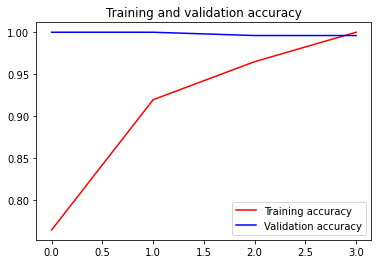

<Figure size 432x288 with 0 Axes>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Model

# ------------ with customized weight ------------- #

# !wget --no-check-certificate \
#     https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
#     -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

# local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
#                                 include_top = False, 
#                                 weights = None)

# pre_trained_model.load_weights(local_weights_file)

# for layer in pre_trained_model.layers:
#   layer.trainable = False

# ------------ with customized weight ------------- #


# without customized weight
base_model = InceptionV3(include_top=False, input_shape=(150,150,3))

for layer in base_model.layers:
    layer.trainable=False

# ----------- with extracted feature layers -------- #

# last_layer = base_model.get_layer('mixed7')
# last_output = last_layer.output
# x = Flatten()(last_output)
# x = Dense(1024, 'relu')(x)
# x = Dense(1, 'sigmoid')(x)

# ----------- with extracted feature layers -------- #

x = base_model.output
x = Flatten()(x)
x = Dense(1024, 'relu')(x)
x = Dense(1, 'sigmoid')(x)

model_transfer_learning = Model(inputs=base_model.input, outputs=x)

model_transfer_learning.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

mycallback = myCallback()

history_transfer_learning = model_transfer_learning.fit(train_generator,
                                                        validation_data=validation_generator,
                                                        steps_per_epoch=10,
                                                        epochs=10,
                                                        callbacks=[mycallback])

acc = history_transfer_learning.history['acc']
val_acc = history_transfer_learning.history['val_acc']
loss = history_transfer_learning.history['loss']
val_loss = history_transfer_learning.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

###With customized weight

In [ ]:
# with customized weight

# !wget --no-check-certificate \
#     https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
#     -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

# local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
# pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
#                                 include_top = False, 
#                                 weights = None)
# pre_trained_model.load_weights(local_weights_file)

##Multiclass Classification + tfds

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

dataset1: tf_flowers
- shapes are different
- needs manually split into train and test

In [ ]:
### ----------- get data ----------- ###
flowers_splits = ['train[:70%]', 'train[70%:90%]', 'train[90%:]']

flowers_ds, info = tfds.load('tf_flowers', split=f_splits, with_info=True, shuffle_files=True,  as_supervised=True)
(train_flowers_ds, validation_flowers_ds, test_flowers_ds) = flowers_ds
### ----------- get data ----------- ###

num_dataset = info.splits['train'].num_examples
num_classes = info.features['label'].num_classes

# check the spec of dataset
print(num_dataset)
print(num_classes)

# check the shape and label of each image
for image, label in train_flowers_ds.take(1):
    print("image shape: ", image.numpy().shape)
    print("label: ", label.numpy())

3670
5
image shape:  (240, 182, 3)
label:  1


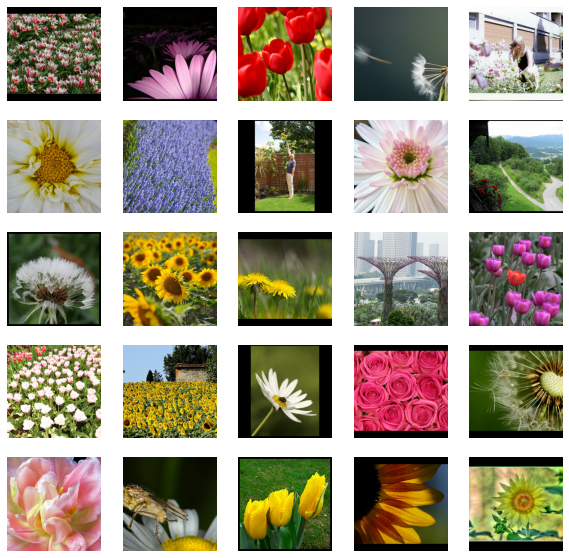

In [ ]:
### ----------- convert dtype + resize + padding ----------- ###
IMAGE_SIZE = 250
def convert_dtype(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32)
    return image, label

def resize_image(image, label):
    image, label = convert_dtype(image, label)
    image = tf.image.resize_with_crop_or_pad(image, IMAGE_SIZE, IMAGE_SIZE)
    return image, label

BATCH_SIZE = 32
resized_train_flowers_ds = train_flowers_ds.map(resize_image).shuffle(10).batch(BATCH_SIZE)
resized_validation_flowers_ds = validation_flowers_ds.map(resize_image).shuffle(10).batch(BATCH_SIZE)
### ----------- convert dtype + resize + padding ----------- ###

def visualize_batch(image_batch, label_batch, num_visual, row_col):
    plt.figure(figsize=(10,10))
    for i in range(num_visual):
        ax = plt.subplot(row_col, row_col, i+1)
        plt.imshow(image_batch[i])
        plt.axis('off')
        
image_batch, label_batch = next(iter(resized_train_flowers_ds))
visualize_batch(image_batch, label_batch, 25, 5)

Epoch 1/10
81/81 [==============================] - 11s 140ms/step - loss: 0.7108 - acc: 0.7801 - val_loss: 0.4143 - val_acc: 0.8529
Epoch 2/10
81/81 [==============================] - 11s 130ms/step - loss: 0.0805 - acc: 0.9766 - val_loss: 0.4306 - val_acc: 0.8692
Epoch 3/10
81/81 [==============================] - 11s 130ms/step - loss: 0.0158 - acc: 0.9969 - val_loss: 0.4094 - val_acc: 0.8801
Epoch 4/10
81/81 [==============================] - 11s 131ms/step - loss: 0.0063 - acc: 0.9992 - val_loss: 0.3989 - val_acc: 0.8828
Epoch 5/10
81/81 [==============================] - 11s 131ms/step - loss: 0.0052 - acc: 0.9992 - val_loss: 0.3971 - val_acc: 0.8883
Epoch 6/10
81/81 [==============================] - 11s 134ms/step - loss: 0.0057 - acc: 0.9992 - val_loss: 0.4101 - val_acc: 0.8828
Epoch 7/10
81/81 [==============================] - 11s 135ms/step - loss: 0.0077 - acc: 0.9992 - val_loss: 0.4228 - val_acc: 0.8856
Epoch 8/10
81/81 [==============================] - 11s 134ms/step - 

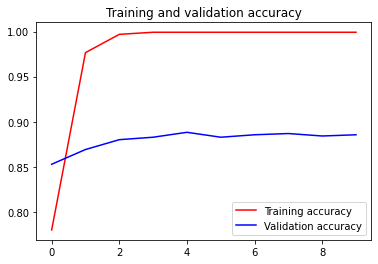

<Figure size 432x288 with 0 Axes>

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model

base_model = MobileNetV2(
    input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3),
    include_top = False,
)
base_model.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(256, 'relu')(x)
x = Dense(5, 'softmax')(x)

model_flower_transfer = Model(inputs=base_model.input, outputs=x)

model_flower_transfer.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                              loss = "sparse_categorical_crossentropy",
                              metrics=['acc'])

history_flower = model_flower_transfer.fit(resized_train_flowers_ds, epochs=10,
                                           validation_data=resized_validation_flowers_ds)

acc = history_flower.history['acc']
val_acc = history_flower.history['val_acc']
loss = history_flower.history['loss']
val_loss = history_flower.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

#NLP

##Preprocess text data: **json, csv**, replace stop words


***json***

In [ ]:
# keys: ['headline', 'is_sarcastic', 'artical_link']
import json

with open('sarcasm.json', 'r') as f
    ds = json.load(f)

sentences, labels, urls = [], [], []
for data in ds:
    sentences.append(data['headline'])
    labels.append(['is_sarcastic'])
    urls.append(['artical_link'])


***csv***: make sure to convert numbers from string type in csv to **int** or **float**

In [ ]:
# keys: ['text', 'category', 'retweet']
import csv
sentencs, labels, num_retweet = [], [], []
with open('./bbc-text.csv', 'r') as f:
    reader = csv.DictReader(f, delimiter=',')
    for row in reader:
        sentences.append(row['text'])
        labels.append(row['category'])
        num_retweet.append(int(row['retweet']))

***replace stopwords***: csv as example

In [ ]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
import csv
sentencs, labels, num_retweet = [], [], []
with open('./bbc-text.csv', 'r') as f:
    reader = csv.DictReader(f, delimiter=',')
    for row in reader:
        labels.append(row['category'])
        num_retweet.append(row['retweet'])

        sentence = row['text']
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
            sentence = sentence.replace("  ", " ")
        sentences.append(sentence)

##Prediction: bbc.csv + GlobalAveragePooling1D, Dense
**multi-class classification**

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

Epoch 1/20
56/56 [==============================] - 1s 9ms/step - loss: 1.7635 - acc: 0.2416 - val_loss: 1.7258 - val_acc: 0.2303
Epoch 2/20
56/56 [==============================] - 0s 8ms/step - loss: 1.6816 - acc: 0.2303 - val_loss: 1.6295 - val_acc: 0.2303
Epoch 3/20
56/56 [==============================] - 0s 8ms/step - loss: 1.5879 - acc: 0.2371 - val_loss: 1.5367 - val_acc: 0.3096
Epoch 4/20
56/56 [==============================] - 0s 7ms/step - loss: 1.4853 - acc: 0.4472 - val_loss: 1.4197 - val_acc: 0.5163
Epoch 5/20
56/56 [==============================] - 0s 7ms/step - loss: 1.3464 - acc: 0.6067 - val_loss: 1.2561 - val_acc: 0.6669
Epoch 6/20
56/56 [==============================] - 0s 8ms/step - loss: 1.1633 - acc: 0.7107 - val_loss: 1.0531 - val_acc: 0.7461
Epoch 7/20
56/56 [==============================] - 0s 8ms/step - loss: 0.9579 - acc: 0.7663 - val_loss: 0.8578 - val_acc: 0.8213
Epoch 8/20
56/56 [==============================] - 0s 8ms/step - loss: 0.7747 - acc: 0.86

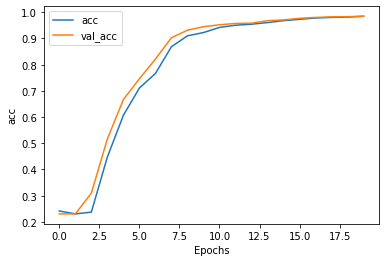

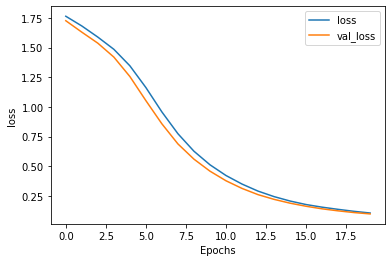

In [ ]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type, padding_type = 'post', 'post'
oov_tok = '<oov>'
train_portion = .8

sentences, labels = [], []
with open('/tmp/bbc-text.csv', 'r') as f:
    csvreader = csv.DictReader(f, delimiter=',')
    for row in csvreader:
        sentences.append(row['text'])
        labels.append(row['category'])

train_size = int(len(sentences)*train_portion)

train_sentences, train_labels = sentences[:train_size], labels[:train_size]
val_sentences, val_labels = sentences[:train_size], labels[:train_size]

# train data
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequence = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequence, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# validation data
val_sequence = tokenizer.texts_to_sequences(val_sentences)
val_padded = pad_sequences(val_sequence, maxlen=max_length, padding=padding_type, truncating=padding_type)

# labels - since labels are strings, so we need to convert into np.array(sequences) with no padding
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
train_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
val_label_seq = np.array(label_tokenizer.texts_to_sequences(val_labels))

output_neurons = len(set(labels))+1

model_bbc = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(32, 'relu'),
    Dense(output_neurons, 'softmax')
])

model_bbc.compile('adam','sparse_categorical_crossentropy', metrics=['acc'])

epochs = 20
history_bbc = model_bbc.fit(train_padded, 
                            train_label_seq, 
                            epochs=epochs, 
                            validation_data=(val_padded, val_label_seq))

import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history_bbc, "acc")
plot_graphs(history_bbc, "loss")

In [ ]:
label_tokenizer.word_index

{'business': 2, 'entertainment': 5, 'politics': 3, 'sport': 1, 'tech': 4}

##Prediction: tfds(imdb) + (GRU, LSTM, Conv1D)
**binary classification**


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteA7D8M1/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteA7D8M1/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteA7D8M1/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
Epoch 1/5
782/782 [==============================] - 25s 33ms/step - loss: 0.5317 - acc: 0.7119 - val_loss: 0.4365 - val_acc: 0.8150
Epoch 2/5
782/782 [==============================] - 24s 31ms/step - loss: 0.2835 - acc: 0.8921 - val_loss: 0.4181 - val_acc: 0.8240
Epoch 3/5
782/782 [==============================] - 24s 31ms/step - loss: 0.1690 - acc: 0.9417 - val_loss: 0.4906 - val_acc: 0.8016
Epoch 4/5
782/782 [==============================] - 25s 32ms/step - loss: 0.1048 - acc: 0.9661 - val_loss: 0.6320 - val_acc: 0.8065
Epoch 5/5
782/782 [==============================] - 24s 30ms/step - loss: 0.0720 - acc: 0.9766 - val_loss: 0.6830 - val_acc: 0.8002


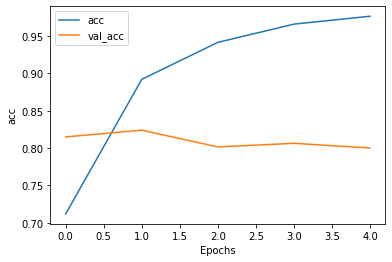

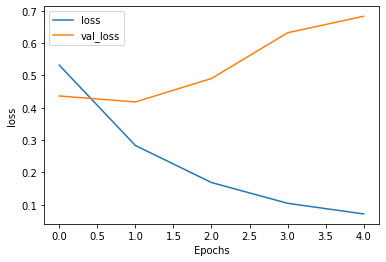

In [ ]:
import numpy as np
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, RNN, GRU, Bidirectional
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Dropout

imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)
train_data, val_data = imdb['train'], imdb['test']
train_sentences, train_labels = [], []
val_sentences, val_labels = [], []

for s, l in train_data:
    train_sentences.append(str(s.numpy()))
    train_labels.append(l.numpy())
for s, l in val_data:
    val_sentences.append(str(s.numpy()))
    val_labels.append(l.numpy())

train_labels, val_labels = np.array(train_labels), np.array(val_labels)

embedding_dim = 16
max_length = 120

tokenizer = Tokenizer(oov_token='<oov>')
tokenizer.fit_on_texts(train_sentences)
train_seq = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_seq, maxlen=max_length, truncating='post', padding='post')
val_seq = tokenizer.texts_to_sequences(val_sentences)
val_padded = pad_sequences(val_seq, maxlen=max_length, padding='post', truncating='post')

model_imdb = Sequential([
    Embedding(len(tokenizer.word_index), embedding_dim, input_length=max_length),
    Conv1D(8, 4, activation='relu'),
    MaxPooling1D(),
    Dropout(0.5),
    Bidirectional(LSTM(8, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(GRU(8)),
    Dropout(0.5),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_imdb.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

history_imdb = model_imdb.fit(train_padded, train_labels, epochs=5, validation_data=(val_padded, val_labels))

import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history_imdb, 'acc')
plot_graphs(history_imdb, 'loss')

##Prediction: built-in encoder

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

tokenizer = info.features['text'].encoder

BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)

train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_dataset.padded_batch(BATCH_SIZE)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64, None),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

##Generation + Regularizers + process **txt**

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow.keras.utils as ku
import numpy as np

tokenizer = Tokenizer()
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
#------- make sure to plus 1 for vocab size ----------#
vocab_size = len(tokenizer.word_index) + 1

input_seqs = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0] #[[1,2,3,4]][0] -> [1,2,3,4]
    for i in range(1, len(token_list)):
        n_gram_seq = token_list[:i+1]
        input_seqs.append(n_gram_seq)

max_len = max(len(x) for x in input_seqs)
input_padded = np.array(pad_sequences(input_seqs, maxlen = max_len, padding='pre'))

x, y = input_padded[:, :-1], input_padded[:, -1]

y = ku.to_categorical(y, num_classes=vocab_size)

model_shakepear = Sequential([
    #------------- make sure it's max_len - 1 since we took the last one out for label ----------#
    Embedding(vocab_size, 100, input_length=max_len-1),
    Bidirectional(LSTM(150, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(100)),
    Dense(vocab_size//2, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(vocab_size, activation='softmax')
])

model_shakepear.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])
history_shakespear = model_shakepear.fit(x, y, epochs=100)


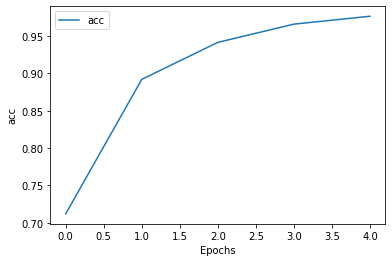

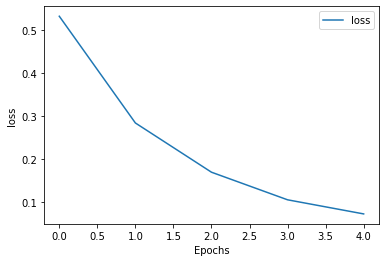

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Help me Obi Wan Kenobi, you're my only hope thy sins will thine 'no taken free free forth things dead shown ' seem true they did sweets seen thee so much substance doth won erred fall to stay ill past express'd express'd or gracious true age young now seen out so tongue right men so bright dead rare ' contains contains dyed rage age again doth groan are dun commits light forth men doth groan live none in it best writ thee not so she is not thine own eyes best doth compile translate thee there live doth crown'd with you in you see you so best must make


In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string], label=string)
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend()
  plt.show()

plot_graphs(history_shakespear, 'acc')
plot_graphs(history_shakespear, 'loss')

next_words = 100
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

##Save model, history, tokenizer

In [ ]:
import json
import pickle

model_shakepear.save('model_shakespear.h5')
json.dump(history_shakespear.history, open('./history_shakespear', 'w'))

# saving
with open('./tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
# with open('tokenizer.pickle', 'rb') as handle:
#     tokenizer = pickle.load(handle)

- WARNING:tensorflow:From <ipython-input-11-2c5662e68cb2>:17: Sequential.predict_classes (from tensorflow.python.keras.engine.sequential) is deprecated and will be removed after 2021-01-01.

- Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
WARNING:tensorflow:From <ipython-input-11-2c5662e68cb2>:17: Sequential.predict_classes (from tensorflow.python.keras.engine.sequential) is deprecated and will be removed after 2021-01-01.


#Time series

###LSTM

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/Sunspots.csv \
    -O /tmp/sunspots.csv

--2020-07-19 19:20:44--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/Sunspots.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70827 (69K) [application/octet-stream]
Saving to: ‘/tmp/sunspots.csv’

/tmp/sunspots.csv   100%[===================>]  69.17K  --.-KB/s    in 0.001s  

2020-07-19 19:20:45 (108 MB/s) - ‘/tmp/sunspots.csv’ saved [70827/70827]



In [ ]:
import csv
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Lambda, Bidirectional, LSTM, Dense
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import Huber

time_step = []
sunspots = []

with open('/tmp/sunspots.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    sunspots.append(float(row[2]))
    time_step.append(int(row[0]))

series = np.array(sunspots)
time = np.array(time_step)

train_split = int(0.8 * len(time))
time_train, x_train = time[:train_split], series[:train_split]
time_valid, x_valid = time[train_split:], series[train_split:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

def windowed_dataset_2_vec(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size+1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda window : window.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer_size).map(lambda window: (window[:-1], window[-1]))
    ds = ds.batch(batch_size).prefetch(1)
    return ds

def windowed_dataset_2_seq(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size+1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda window : window.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer_size).map(lambda window: (window[:-1], window[1:]))
    ds = ds.batch(batch_size).prefetch(1)
    return ds

tf.random.set_seed(51)
np.random.seed(51)
dataset = windowed_dataset_2_vec(x_train, window_size, batch_size, shuffle_buffer_size)

last_lambda_coefficient = np.median(x_train)

model = Sequential([
    # Lambda(lambda x : tf.expand_dims(x, axis=-1), input_shape=[None]),
    Bidirectional(LSTM(64, return_sequences=True, input_shape=[None])),
    Bidirectional(LSTM(32)),
    Dense(64, activation='relu'),
    Dense(1),
    Lambda(lambda x: x*last_lambda_coefficient)                
])

lr_scheduler = LearningRateScheduler(lambda epoch : 1e-8*10**(epoch/20))

model.compile(loss=Huber(), optimizer=SGD(lr=1e-8, momentum=0.9),metrics=['mae'])

history = model.fit(dataset, epochs=100, callbacks=[lr_scheduler], verbose=2)

(1e-08, 0.001, 0.0, 60.0)

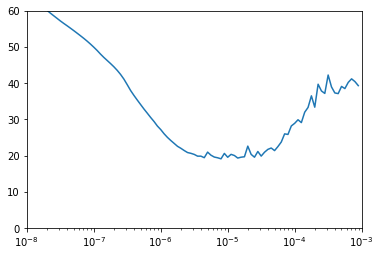

In [ ]:
plt.semilogx(history.history['lr'], history.history['loss'])
plt.axis([1e-8, 1e-3, 0, 60])

In [ ]:
dataset_2_vec = windowed_dataset_2_vec(x_train, window_size, batch_size, shuffle_buffer_size)
dataset_2_seq = windowed_dataset_2_vec(x_train, window_size, batch_size, shuffle_buffer_size)

model_2_vec = Sequential([
    Lambda(lambda x : tf.expand_dims(x, axis=-1), input_shape=[None]),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(64)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1),
    Lambda(lambda x: x*last_lambda_coefficient)                
])

model_2_seq = Sequential([
    Lambda(lambda x : tf.expand_dims(x, axis=-1), input_shape=[None]),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1),
    Lambda(lambda x: x*last_lambda_coefficient)                
])

model_2_vec.compile(loss=Huber(), optimizer=SGD(lr=1e-5, momentum=0.9),metrics=['mae'])
model_2_seq.compile(loss=Huber(), optimizer=SGD(lr=1e-5, momentum=0.9),metrics=['mae'])

history_to_vec = model_2_vec.fit(dataset_2_vec, epochs=100, verbose=1)
history_to_seq = model_2_seq.fit(dataset_2_seq, epochs=100, verbose=1)


In [ ]:
forecast_2_vec, forecast_2_seq = [], []
for time in range(len(series)-window_size):
    forecast_2_vec.append(model_2_vec.predict(series[time:time+window_size][np.newaxis]))

for time in range(len(series)-window_size):
    forecast_2_seq.append(model_2_seq.predict(series[time:time+window_size][np.newaxis]))

In [ ]:
forecast_2_vec = np.array(forecast_2_vec[train_split-window_size:])
forecast_2_seq = np.array(forecast_2_seq[train_split-window_size:])
print(forecast_2_vec.shape)
print(forecast_2_seq.shape)

(647, 1, 1)
(647, 1, 20, 1)


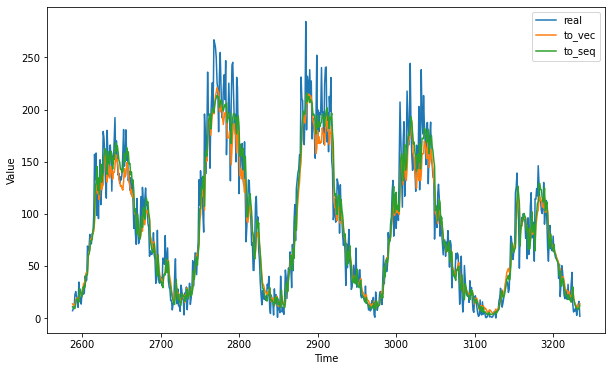

In [ ]:
results_2_vec = forecast_2_vec[:,0,0]    #(641,1,1)
results_2_seq = forecast_2_seq[:,0,-1,0] #(641,1,20,1)

plt.figure(figsize=(10, 6))

def plot_series(time, series, label, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(False)

plot_series(time_valid, x_valid, 'real')
plot_series(time_valid, results_2_vec, 'to_vec')
plot_series(time_valid, results_2_seq, 'to_seq')

In [ ]:
print(tf.keras.metrics.mean_absolute_error(x_valid, results_2_vec).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results_2_seq).numpy())

16.986233
16.351046


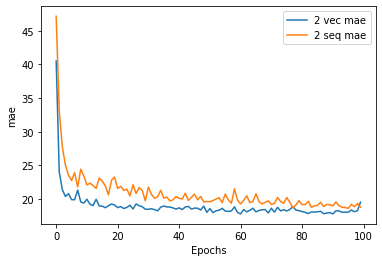

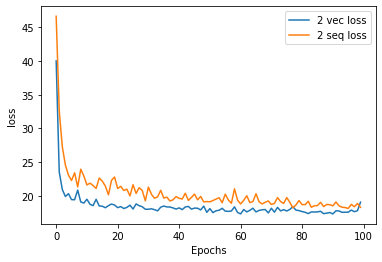

In [ ]:
def plot_graph(epochs, history, string, label):
    plt.plot(epochs, history.history[string], label=label)
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend()

mae_vec  = history_to_vec.history['mae']
loss_vec = history_to_vec.history['loss']
mae_vec  = history_to_seq.history['mae']
loss_vec = history_to_seq.history['loss']
epochs   = range(len(mae_vec))

plot_graph(epochs, history_to_vec, 'mae', '2 vec mae')
plot_graph(epochs, history_to_seq, 'mae', '2 seq mae')
plt.figure()
plot_graph(epochs, history_to_vec, 'loss', '2 vec loss')
plot_graph(epochs, history_to_seq, 'loss', '2 seq loss')
plt.show()

###CNN - Conv1D

In [ ]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv \
    -O /tmp/daily-min-temperatures.csv

--2020-07-19 19:17:52--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67921 (66K) [text/plain]
Saving to: ‘/tmp/daily-min-temperatures.csv’

/tmp/daily-min-temp 100%[===================>]  66.33K  --.-KB/s    in 0.008s  

2020-07-19 19:17:52 (8.29 MB/s) - ‘/tmp/daily-min-temperatures.csv’ saved [67921/67921]



In [ ]:
import csv
time_steps, temps = [], []
with open('/tmp/daily-min-temperatures.csv') as f:
    csvreader = csv.reader(f, delimiter=',')
    next(csvreader)
    for row in csvreader:
        temps.append(float(row[1]))
time_steps, series = np.arange(len(temps)), np.array(temps)

In [ ]:
split_portion = 0.8
train_split = int(split_portion * len(temps))
time_train, x_train = time_steps[:train_split], series[:train_split]
time_valid, x_valid = time_steps[train_split:], series[train_split:]
print(time_train.shape)
print(x_train.shape)
print(time_valid.shape)
print(x_valid.shape)

(2920,)
(2920,)
(730,)
(730,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Lambda
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import Huber

window_size = 64
batch_size = 128
shuffle_buffer_size = 1000

def windowed_dataset(series, window_sise, batch_size, shuffle_buffer_size):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size+1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w : w.batch(window_size+1))
    ds = ds.shuffle(shuffle_buffer_size)
    ds = ds.map(lambda w : (w[:-1], w[1:]))
    ds = ds.batch(batch_size).prefetch(1)
    return ds 

def model_forecast(model, series, window_size, batch_size):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w : w.batch(window_size))
    ds = ds.batch(batch_size).prefetch(1)
    forecast = model.predict(ds)
    return forecast

tf.keras.backend.clear_session()
tf.random.set_seed(0)
np.random.seed(0)

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential([
    Conv1D(32, 5, padding='causal', activation='relu', input_shape=[None,1]),
    LSTM(64, return_sequences=True),
    LSTM(64, return_sequences=True),
    Dense(32, 'relu'),
    Dense(16, 'relu'),
    Dense(1),
    Lambda(lambda x : x * 20)
])

# model.summary()

# ---------------- uncommon for finding optimial lr ------------------- #
# lr_scheduler = LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch/20))
# optimizer = SGD(lr=1e-8, momentum=0.9)

# model.compile(loss=Huber(), optimizer=optimizer, metrics=['mae'])
# history=model.fit(train_set, epochs=100, callbacks=[lr_scheduler])

# plt.semilogx(history.history["lr"], history.history["loss"])
# plt.axis([1e-8, 1e-4, 0, 30])
# ---------------- uncommon for finding optimial lr ------------------- #

model.compile(SGD(lr=1e-5,momentum=0.9), Huber(), ['mae'])
history = model.fit(train_set, epochs=300)

In [ ]:
forecast = model_forecast(model, series, window_size, batch_size)
forecast = forecast[train_split-window_size:-1,-1,0]
tf.keras.metrics.mean_absolute_error(x_valid, forecast).numpy()

1.7361696

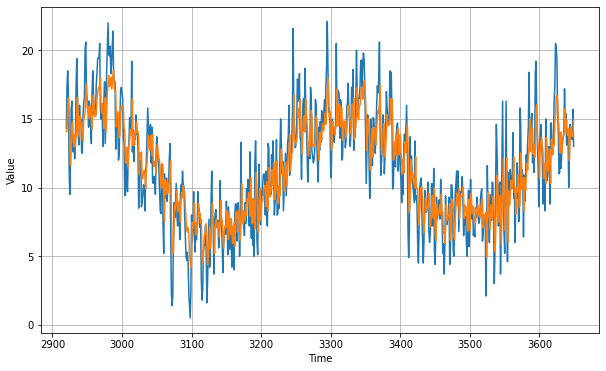

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)
    
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, forecast)

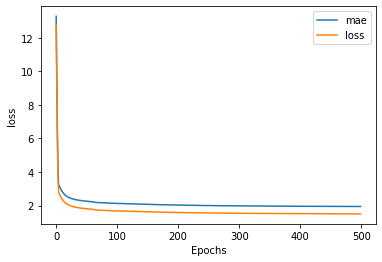

In [ ]:
def plot_graph(epochs, history, string):
    metrics = history.history[string]
    plt.plot(range(len(metrics)), metrics, label=string)
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend()

plot_graph(epochs, history, 'mae')
plot_graph(epochs, history, 'loss')